# Comprehensive Study of World Happiness

## Import Necessary Libraries and Load the Dataset
First, import the necessary libraries and load the dataset world_happiness.csv.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [18]:
# Load the dataset
df = pd.read_csv('world_happiness.csv', index_col=0)

# Display the first few rows
df.head()


,country,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
1,Finland,2.0,5.0,4.0,47.0,42400,81.8,155
2,Denmark,4.0,6.0,3.0,22.0,48300,81.0,154
3,Norway,3.0,3.0,8.0,11.0,66300,82.6,153
4,Iceland,1.0,7.0,45.0,3.0,47900,83.0,152
5,Netherlands,15.0,19.0,12.0,7.0,50500,81.8,151


## Statistics
### 1. Calculate the Mean, Median, and Standard Deviation of the `happiness_score` Across All Countries

In [19]:
# Calculate descriptive statistics
mean_happiness = df['happiness_score'].mean()
median_happiness = df['happiness_score'].median()
std_happiness = df['happiness_score'].std()

print(f"Mean Happiness Score: {mean_happiness:.2f}")
print(f"Median Happiness Score: {median_happiness:.2f}")
print(f"Standard Deviation of Happiness Score: {std_happiness:.2f}")


Mean Happiness Score: 77.64
Median Happiness Score: 79.00
Standard Deviation of Happiness Score: 46.38


### 2. Find the Top 5 Countries with the Highest `gdp_per_cap` and Plot Their happiness_score in a Bar Chart

In [20]:
# Find the top 5 countries
top5_gdp = df.nlargest(5, 'gdp_per_cap')

# Display the top 5 countries with their GDP per capita and happiness score
top5_gdp[['country', 'gdp_per_cap', 'happiness_score']]

,country,gdp_per_cap,happiness_score
28,Qatar,113000,127
14,Luxembourg,94300,142
33,Singapore,90100,122
16,Ireland,72400,140
3,Norway,66300,153


Bar Chart:

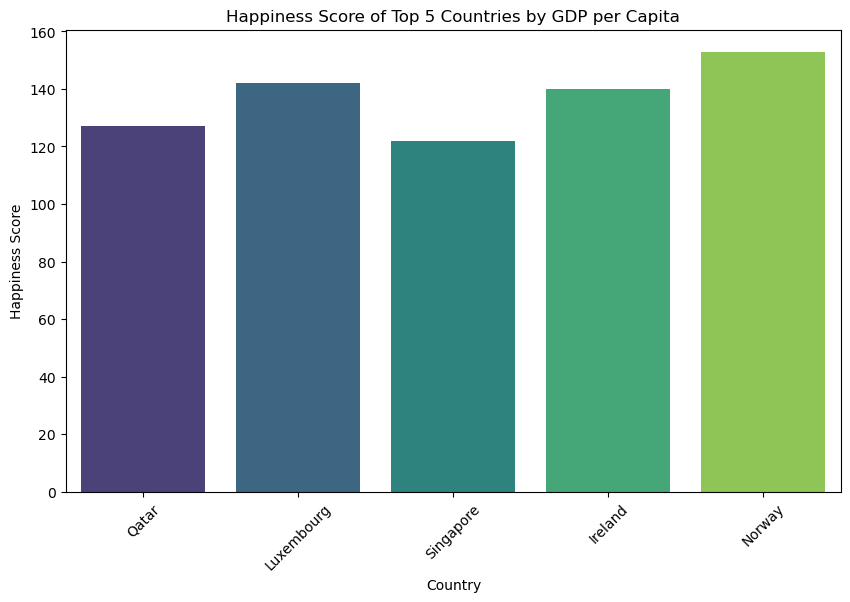

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(x='country', y='happiness_score', data=top5_gdp, palette='viridis', hue='country')
plt.title('Happiness Score of Top 5 Countries by GDP per Capita')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45)
plt.show()

### 3. Compute the Correlation Matrix for All Numerical Variables in the Dataset

In [22]:
# Compute the correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Display the correlation matrix
corr_matrix

,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
social_support,1.000000,0.470893,0.154848,0.449225,-0.687268,-0.705512,-0.824702
freedom,0.470893,1.000000,0.387234,0.493207,-0.444420,-0.388856,-0.567582
corruption,0.154848,0.387234,1.000000,0.305043,-0.335716,-0.135665,-0.215308
generosity,0.449225,0.493207,0.305043,1.000000,-0.531636,-0.433144,-0.499259
gdp_per_cap,-0.687268,-0.444420,-0.335716,-0.531636,1.000000,0.701955,0.727973
life_exp,-0.705512,-0.388856,-0.135665,-0.433144,0.701955,1.000000,0.780225
happiness_score,-0.824702,-0.567582,-0.215308,-0.499259,0.727973,0.780225,1.000000


Heatmap of the Correlation Matrix:

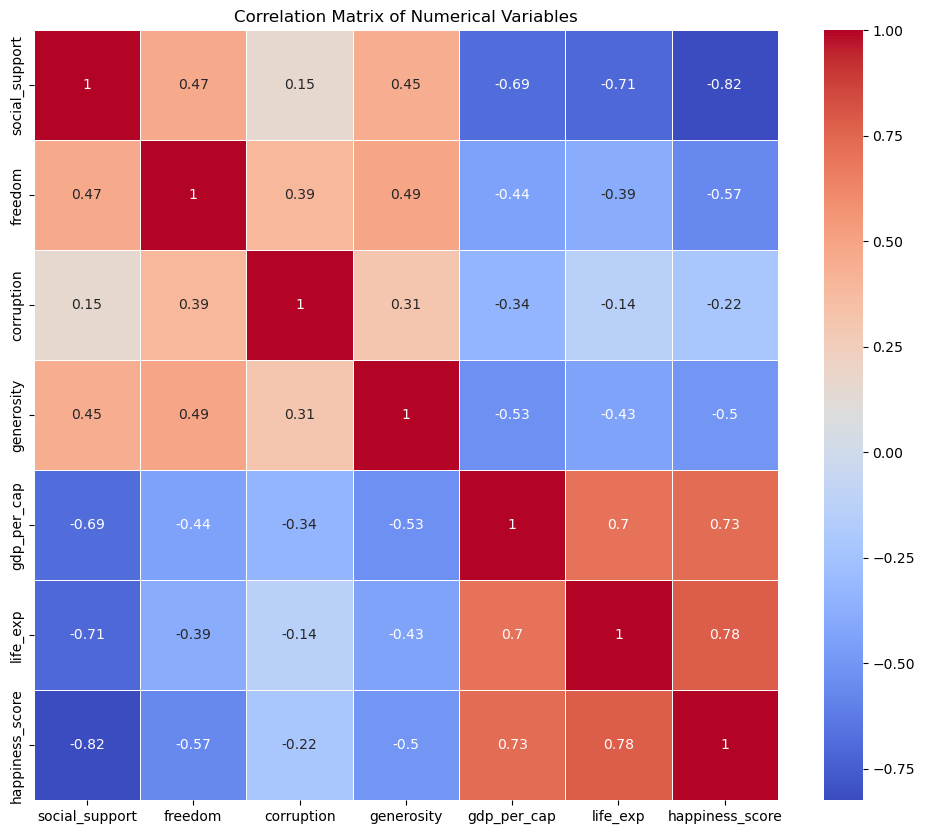

In [23]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

### 4. Plot a Histogram of `life_exp` and Analyze Its Distribution

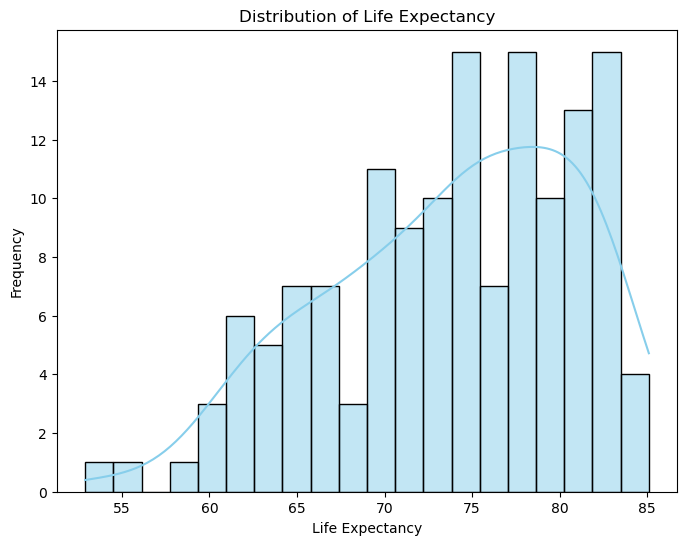

In [24]:
plt.figure(figsize=(8, 6))
sns.histplot(df['life_exp'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.show()

Analysis:

In [25]:
# Calculate skewness and kurtosis
skewness = df['life_exp'].skew()
kurtosis = df['life_exp'].kurt()

print(f"Skewness of life expectancy: {skewness:.2f}")
print(f"Kurtosis of life expectancy: {kurtosis:.2f}")

Skewness of life expectancy: -0.53
Kurtosis of life expectancy: -0.50


## Probability
### 5. Probability That a Randomly Selected Country Has a `social_support` Score Greater Than 50

In [26]:
# Total number of countries
total_countries = df.shape[0]

# Number of countries with social support > 50
countries_social_support_gt_50 = df[df['social_support'] > 50].shape[0]

# Calculate the probability
probability = countries_social_support_gt_50 / total_countries

print(f"Probability that a randomly selected country has a social support score greater than 50: {probability:.2f}")

Probability that a randomly selected country has a social support score greater than 50: 0.66


### 6. Probability That a Randomly Selected Country Has a `life_exp` Greater Than 80 Years
Assuming `life_exp` is normally distributed.

In [27]:
# Calculate mean and standard deviation
mean_life_exp = df['life_exp'].mean()
std_life_exp = df['life_exp'].std()

# Calculate the Z-score for life expectancy of 80 years
z_score = (80 - mean_life_exp) / std_life_exp

# Calculate the probability
probability = 1 - stats.norm.cdf(z_score)

print(f"Probability that life expectancy is greater than 80 years: {probability:.4f}")

Probability that life expectancy is greater than 80 years: 0.1909


## Inference
### 7. Perform a Linear Regression Analysis to Predict `happiness_score` Based on `gdp_per_cap`

In [28]:
from sklearn.linear_model import LinearRegression

# Prepare the data
X = df[['gdp_per_cap']]
y = df['happiness_score']

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Retrieve the coefficient and intercept
coef = model.coef_[0]
intercept = model.intercept_

print(f"Linear Regression Equation: happiness_score = {intercept:.2f} + {coef:.5f} * gdp_per_cap")

# Calculate R-squared
r_squared = model.score(X, y)
print(f"R-squared: {r_squared:.2f}")


Linear Regression Equation: happiness_score = 44.61 + 0.00164 * gdp_per_cap
R-squared: 0.53


Scatter Plot with Regression Line:

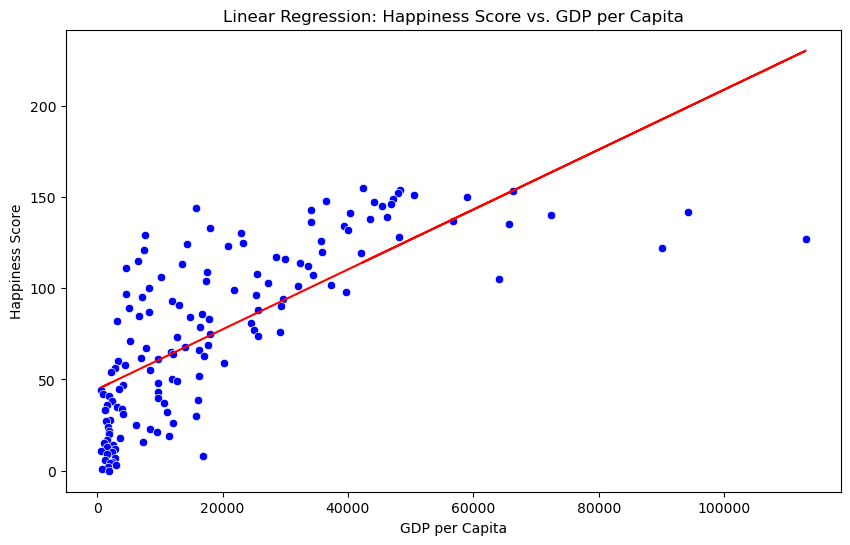

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='gdp_per_cap', y='happiness_score', data=df, color='blue')
plt.plot(df['gdp_per_cap'], model.predict(X), color='red')
plt.title('Linear Regression: Happiness Score vs. GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.show()

## Hypothesis Testing

### 8. Test for Significant Difference in `life_exp` Between Countries with `social_support` Above and Below the Median

Hypotheses:

- Null Hypothesis (H₀): There is no significant difference in life expectancy between the two groups.
- Alternative Hypothesis (H₁): There is a significant difference in life expectancy between the two groups.

In [30]:
# Calculate the median of social_support
median_social_support = df['social_support'].median()

# Split the data into two groups
group_high = df[df['social_support'] > median_social_support]['life_exp']
group_low = df[df['social_support'] <= median_social_support]['life_exp']

# Perform an independent two-sample t-test
t_stat, p_value = stats.ttest_ind(group_high, group_low, equal_var=False)

print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.10f}")

T-statistic: -8.83
P-value: 0.0000000000


Conclusion:

In [31]:
alpha = 0.05  # Significance level

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in life expectancy between the two groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in life expectancy between the two groups.")

Reject the null hypothesis: There is a significant difference in life expectancy between the two groups.
